In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_friedman1

In [3]:
X,y = make_friedman1(n_samples= 1000, n_features = 15, noise=0.3, random_state=23)

In [4]:
Xtest,Xtrain,ytest,ytrain = train_test_split(X,y ,test_size=0.25)

In [5]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor

In [6]:
estimators = {'krr':KernelRidge(kernel='rbf', gamma=0.25),
              'svr': SVR(gamma=0.5),
              'dtr': DecisionTreeRegressor(max_depth=3),
              'knn': KNeighborsRegressor(n_neighbors=4),
              'gpr': GaussianProcessRegressor(alpha=1e-1),
              'mlp': MLPRegressor(alpha=25, max_iter=10000)}

In [9]:
for name, estimator in estimators.items():
    print('Training {0}'.format(name))
    estimator = estimator.fit(Xtrain, ytrain)

Training krr
Training svr
Training dtr
Training knn
Training gpr
Training mlp


In [10]:
import numpy as np
n_estimators, n_samples = len(estimators), Xtest.shape[0]

y_individual = np.zeros((n_samples, n_estimators))
for i, (model, estimator) in enumerate(estimators.items()):
    y_individual[:, i] = estimator.predict(Xtest)
y_final = np.mean(y_individual, axis=1)

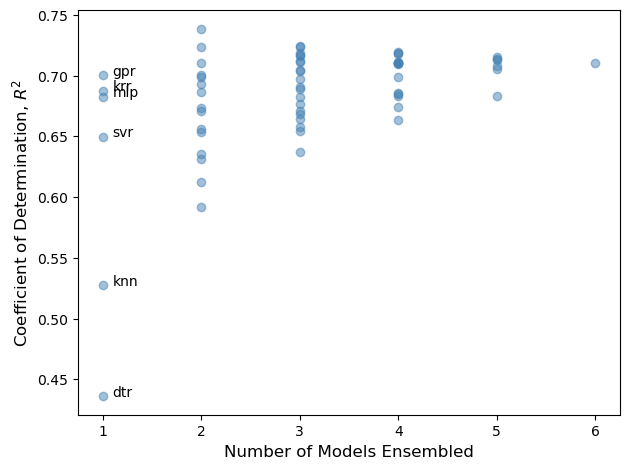

In [12]:
from itertools import combinations
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

models = list(estimators.keys())
combo_mean = np.zeros((len(estimators), ))
combo_std = np.zeros((len(estimators), ))

fig = plt.figure();

for n_ensemble in range(len(estimators)):
    # Get all possible combinations of models of length n_ensemble
    combos = combinations(estimators, n_ensemble + 1)
        
    # Get the average of individual predictions for each combination
    averaged_predictions = [np.mean(np.array([y_individual[:, models.index(e)] for e in list(c)]), axis=0) for c in combos]
    averaged_r2 = [r2_score(ytest, ypred) for ypred in averaged_predictions]
    
    n_combos = len(averaged_r2)
    
    plt.scatter(np.full((n_combos, ), n_ensemble + 1), averaged_r2, color='steelblue', alpha=0.5)
    combo_mean[n_ensemble] = np.mean(averaged_r2)
    combo_std[n_ensemble] = np.std(averaged_r2)
    
    if n_ensemble == 0:
        for r, name in zip(averaged_r2, estimators):
            plt.text(1.1, r, name)
            
plt.xlabel('Number of Models Ensembled', fontsize=12);
plt.ylabel('Coefficient of Determination, $R^2$', fontsize=12);
fig.tight_layout()

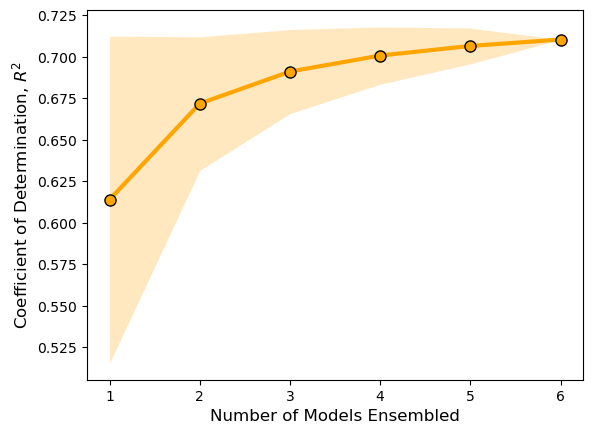

In [13]:
fig = plt.figure()
plt.fill_between(np.arange(1, len(estimators) + 1), 
                combo_mean - combo_std, combo_mean + combo_std, color='orange', alpha=0.25, linewidth=0);
plt.plot(np.arange(1, len(estimators) + 1), combo_mean, marker='o', color='orange', markersize=8, 
        markeredgecolor='k', linewidth=3);
plt.xlabel('Number of Models Ensembled', fontsize=12);
plt.ylabel('Coefficient of Determination, $R^2$', fontsize=12);